# 5. The Need for Packages

Modules are sets of functions and classes that are oriented towards a given goal.
Say you have a bunch of functions that altogether serve one purpose (e.g., connect to a website and download stuff acccording to some criteria).
Then your bunch may be collected into a module.
Packages are sets of modules.

Here are some packages we, as economists, will encounter most often:

- [`numpy`](https://www.numpy.org/) (N-dimensional arrays)
- [`scipy`](https://www.scipy.org/) (mathematical and statistical recipes)
- [`pandas`](https://pandas.pydata.org/) (dataframes, as in R or Stata)
- [`matplotlib`](https://matplotlib.org/) and [`seaborn`](https://seaborn.pydata.org/) (static plotting)
- [`beautifulsoup4`](https://www.crummy.com/software/BeautifulSoup/) (HTML web scraping)
- [`selenium`](https://docs.seleniumhq.org/) (Chrome-driven web scraping)
- [`bokeh`](https://bokeh.pydata.org/) and [`plotly`](https://plot.ly/) (interactive plotting)
- [`networkx`](https://networkx.github.io/) (easy representation of networks)

How you install these packages in your computer depends on your Operating System.
If you have a Windows or macOS machine, then you are most likely using the Anaconda distribution, which bundles most packages and hence they should already be on your computer.
If you use a Linux-based Operating System, you may want to check out your package manager for these modules.

If your package distribution (e.g., Anaconda, APT) does not give you access to a given module, you can use [`pip`](https://docs.python.org/3/installing/index.html), which is Python's integrated package manager.


### How do we use modules/packages?

At the very beginning of your `.py` file, you should include `import` statements.
These statements instruct the Python interpreter to use definitions that are found in those packages.
Note that you can also use shorthands for accessing functions inside modules.

In what follows, we see some notable packages and some of their functions.
The point here is not to teach everything you need about all the packages.
This is just to show minimal working examples, so to get familiar with syntax and some basic functions.

In [2]:
# pip install ... (numpy, matplotlib, pandas)
# conda install ... (numpy, matplotlib, pandas)

In [1]:
import numpy as np  # importing a package, using shorthand later
import matplotlib.pyplot as plt
import pandas as pd

## 5.1 Numpy

[NumPy](https://www.numpy.org/) is a package for Python.
At its core, it defines one thing: N-dimensional arrays.
To better understand, vectors and matrices are 1- and 2-dimensional arrays.
On top of this, NumPy also provides many basic mathematical functions, such as `log()`, `exp()`, `sin()` and so on, together with common mathematical constant like `e`, `pi`, `inf`, `nan` (more below on this one).
The advantage of using NumPy lies in the fact that all operations are optimized to run as fast as possible.

The basic data type NumPy provides is the [`ndarray`](https://docs.scipy.org/doc/numpy/reference/arrays.ndarray.html).
This has several attributes and methods that are useful.
Examples of attributes include: `shape`, `ndim`, and `size`.
Some methods are: `reshape`, `transpose` (shorthanded, `T`), `squeeze` and `min`, `mean`, `argmin`.

Before we dive in some examples, it is useful to clarify something about dimensions.
We typically think of matrices as "rectangles" with two _axes_: rows and columns.
When it comes to vectors, we are normally careful specifying whether it is a row vector or a column vector.
However, in some instances it is not necessary to specify the orientation of a vector (think of the inner product, when we denote it with $\langle x, y \rangle$).
In NumPy, we can have three distinct ways to write a vector:
- one-dimensional vectors, with _no_ orientation;
- two-dimensional row vectors, where the first dimension has size 1; and
- two-dimensional column vectors, where the second dimension has size 1.

### Differences between lists and NumPy Arrays
* An array's size is immutable.  You cannot append, insert or remove elements, like you can with a list.
* All of an array's elements must be of the same [data type](https://docs.scipy.org/doc/numpy-1.14.0/user/basics.types.html).
* A NumPy array behaves in a Pythonic fashion.  You can `len(my_array)` just like you would assume.

In [14]:
sample_list = [4.0, 3.286, 3.5]

In [11]:
# Can have elements appended to it
sample_list.append(4.0)
# Can have multiple datatypes in it.
sample_list.insert(1,'Python')
# Can have items removed
sample = sample_list.pop(1)

In [15]:
print(sample_list)

[4.0, 3.286, 3.5]


In [16]:
sample_list * 2

[4.0, 3.286, 3.5, 4.0, 3.286, 3.5]

In [17]:
sample_array = np.array(sample_list)
sample_array

array([4.   , 3.286, 3.5  ])

In [18]:
sample_array * 2

array([8.   , 6.572, 7.   ])

### Shape and Dimension

Consider the following assignment

In [19]:
z = np.zeros(10)

In [20]:
z

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Here `z` is a *flat* array with no dimension — neither row nor column vector.

The dimension is recorded in the `shape` attribute, which is a tuple

In [21]:
z.shape

(10,)

Here the shape tuple has only one element, which is the length of the array (tuples with one element end with a comma).

To give it dimension, we can change the `shape` attribute

In [22]:
z.shape = (10,1)
z

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [23]:
z = np.zeros((2,3))
z

array([[0., 0., 0.],
       [0., 0., 0.]])

### Creating Arrays

As we’ve seen, the `np.zeros` function creates an array of zeros.

You can probably guess what `np.ones` creates.

#Related is `np.empty`, which creates arrays in memory that can later be populated with data

In [28]:
#y = np.empty(3)
#y

The numbers you see here are garbage values.

(Python allocates 3 contiguous 64 bit pieces of memory, and the existing contents of those memory slots are interpreted as `float64` values)

To set up a grid of evenly spaced numbers use `np.linspace`

In [32]:
z = np.linspace(1, 10, 4)       # From 1 to 10, with 4 elemtes
z

array([ 1.,  4.,  7., 10.])

To create an identity matrix use either `np.identity` or `np.eye`

In [33]:
z = np.eye(3)
z

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In addition, NumPy arrays can be created from Python lists, tuples, etc. using `np.array`

In [34]:
z = np.array([10, 20])
z

array([10, 20])

In [36]:
type(z)

numpy.ndarray

In [37]:
z = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])
z

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

### Array Indexing

For a flat array, indexing is the same as Python sequences:

In [38]:
z = np.linspace(1, 2, 5)
z

array([1.  , 1.25, 1.5 , 1.75, 2.  ])

In [39]:
z[0]

1.0

In [41]:
z[0:2]   # two elements, starting at element 0

array([1.  , 1.25])

In [42]:
z[-1]

2.0

For 2D arrays the index syntax is as follows:

In [43]:
z = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])
z

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [45]:
z[0,0]

1

In [46]:
z[0,1]

2

And so on.

Note that indices are still zero-based, to maintain compatibility with Python sequences.

Columns and rows can be extracted as follows

In [47]:
z[0, :]

array([1, 2, 3])

In [48]:
z[:, 1]

array([2, 5, 8])

### Array Methods

Arrays have useful methods, all of which are carefully optimized

In [49]:
a = np.array([4,3,2,1])

In [50]:
a.sort()          # Sorts a in place
a

array([1, 2, 3, 4])

In [51]:
a.sum()          # sum

10

In [52]:
a.mean()         # mean

2.5

In [53]:
a.argmax()        # Returns the index of the maximal elemts   

3

In [54]:
a.cumsum()        # Cumlative sum of elemets of a

array([ 1,  3,  6, 10])

In [55]:
a.cumprod()       # Cumulative product of the elemets of a

array([ 1,  2,  6, 24])

In [57]:
a.var()          # variance

1.25

In [60]:
a.std()         # standard devation

1.118033988749895

In [63]:
a = a.reshape((2,2))
print(a)
print(a.T)       # a.transpose()

[[1 2]
 [3 4]]
[[1 3]
 [2 4]]


### Operations on Arrays

#### Arithmetic Operations

The operators `+`, `-`, `*`, `/` and `**` all act *elementwise* on arrays

In [64]:
a = np.array([1, 2, 3, 4])
b = np.array([5, 6, 7, 8])

In [65]:
a + b

array([ 6,  8, 10, 12])

In [66]:
a * b

array([ 5, 12, 21, 32])

We can add a scalar to each element as follows

In [70]:
a + 10

array([11, 12, 13, 14])

Scalar multiplication is similar

In [69]:
a * 10

array([10, 20, 30, 40])

The two-dimensional arrays follow the same general rules

In [71]:
A = np.ones((2, 2))
B = np.ones((2, 2))
A

array([[1., 1.],
       [1., 1.]])

In [72]:
A + B

array([[2., 2.],
       [2., 2.]])

In [73]:
A * B

array([[1., 1.],
       [1., 1.]])

In [74]:
A + 10

array([[11., 11.],
       [11., 11.]])

In particular, A * B is not the matrix product, it is an element-wise product.

#### Matrix Multiplication

With Anaconda’s scientific Python package based around Python 3.5 and above,
one can use the `@` symbol for matrix multiplication, as follows:

In [75]:
A = np.array([[1, 2, 3], [4, 5, 6]])
B = np.array([[7, 11, 13, 17], [8, 12, 16, 20], [7, 14, 21, 28]] )
print(A)
print('\n')
print(B)

[[1 2 3]
 [4 5 6]]


[[ 7 11 13 17]
 [ 8 12 16 20]
 [ 7 14 21 28]]


In [76]:
A @ B

array([[ 44,  77, 108, 141],
       [110, 188, 258, 336]])

In [77]:
np.matmul(A, B)

array([[ 44,  77, 108, 141],
       [110, 188, 258, 336]])

### Sub-packages

NumPy provides some additional functionality related to scientific programming
through its sub-packages.

We’ve already seen how we can generate random variables using np.random

In [90]:
z = np.random.randint(1, 100, 50)    # Genrate 50 random integer numbers between 1, 100
y = np.random.normal(0, 1, 10000)    # Generate standard normals

In [85]:
print(z)

[79 94 23 24 31 82 16 53 34  4 52 40 73 75 54 32 20 48 31 12 75 63 89 62
 17 85 16 74 43 33 43 57 74 91 43 20 54 99 72 39 86 82 40 78 65 94 68 92
 10 27]


In [91]:
print(y)

[ 0.10563017  0.24707096  0.47663929 ... -0.86960404 -0.59982386
  1.40694205]


In [92]:
y.mean()

0.01711028062470295

In [93]:
y.std()

0.9996468719133571

In [94]:
y.var()

0.9992938685261598

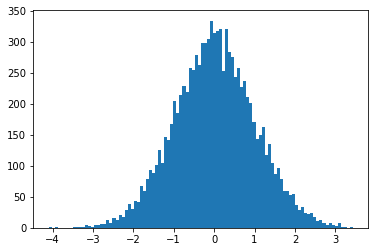

In [95]:
plt.hist(y,100)
plt.show()

## 5.2 Matplotlib

[Matplotlib](https://matplotlib.org/api/index.html) is the go-to library for static plotting.
When you just need to get a figure and you do not need to point-and-click on the figure you obtain, this is the most reliable solution.
While Matplotlib contains many modules, there is one that we will always use, which is [PyPlot](https://matplotlib.org/api/pyplot_summary.html).
This provides all we need to create plots easily.
If you are a Matlab user, using this package will be familiar.

- <b> You can find a lot of example [HERE](https://matplotlib.org/stable/gallery/index.html).

### Line Plot

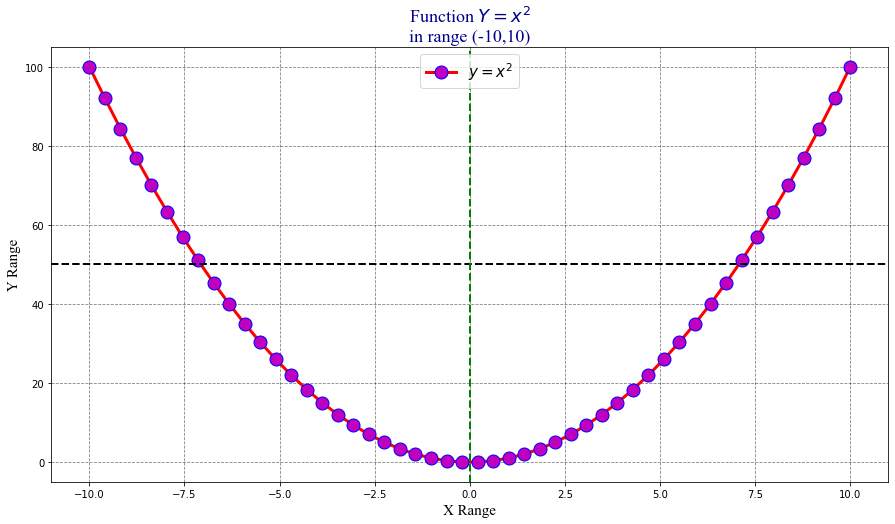

In [157]:
x = np.linspace(-10, 10, 50)
y = x ** 2

plt.figure(figsize=(15,8))
plt.plot(x, y, c='r', ls = '-', lw = 3, marker = 'o', markersize = 13, markeredgecolor = 'b',
         markerfacecolor = 'm', label = '$y = x^2$')

plt.legend(loc = 'upper center', fontsize = 15)
plt.grid(c = 'k', ls = '--', alpha = 0.5)

plt.xlabel('X Range', fontsize = 15, fontweight = 2, fontname = 'Times New Roman')
plt.ylabel('Y Range', fontsize = 15, fontweight = 2, fontname = 'Times New Roman')
plt.title('Function $Y = x^2$\nin range (-10,10)', fontsize = 18, fontweight = 2,
          fontname = 'Times New Roman', c = 'darkblue')

plt.axhline(50, c = 'k', ls = '--', lw = 2)
plt.axvline(0, c = 'g', ls = '--', lw = 2)

#plt.xlim(left = 0, right = 8)
#plt.ylim(bottom = 20, top = 80)

plt.show()

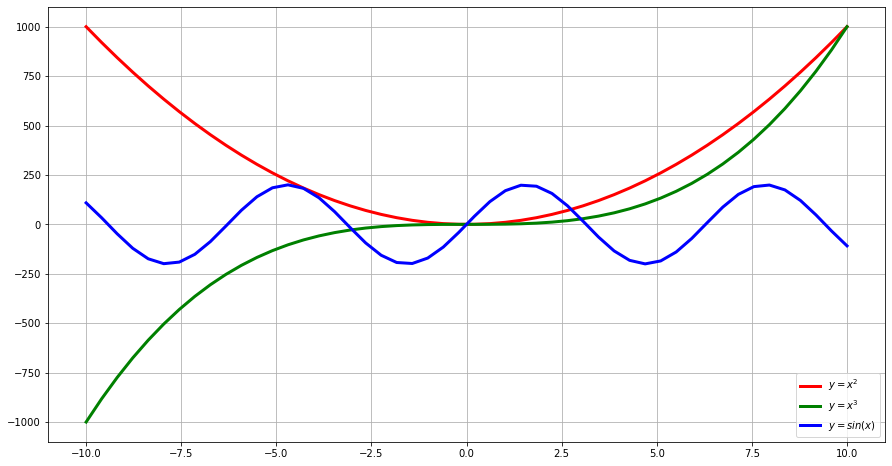

In [169]:
x = np.linspace(-10, 10, 50)
y = x ** 2

plt.figure(figsize=(15,8))
plt.plot(x, 10*y, c = 'r', ls = '-', lw = 3, label = '$y = x^2$')
plt.plot(x, x **3, c = 'g', ls = '-', lw = 3, label = '$y = x^3$')
plt.plot(x, 200 * np.sin(x), c = 'b', ls = '-', lw = 3, label = '$y = sin(x)$')

plt.grid()
plt.legend()
plt.show()

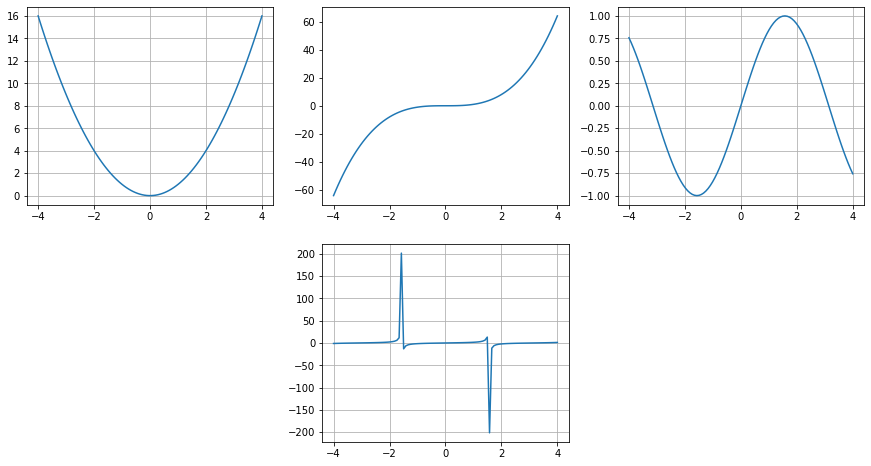

In [206]:
plt.figure(figsize= (15,8))

plt.subplot(2,3,1)
plt.plot(x, x**2)
plt.grid()

plt.subplot(2,3,2)
plt.plot(x, x ** 3)

plt.subplot(2,3,3)
plt.plot(x, np.sin(x))
plt.grid()

plt.subplot(2,3,5)
plt.plot(x, np.tan(x))
plt.grid()

plt.show()

### Bar Plot

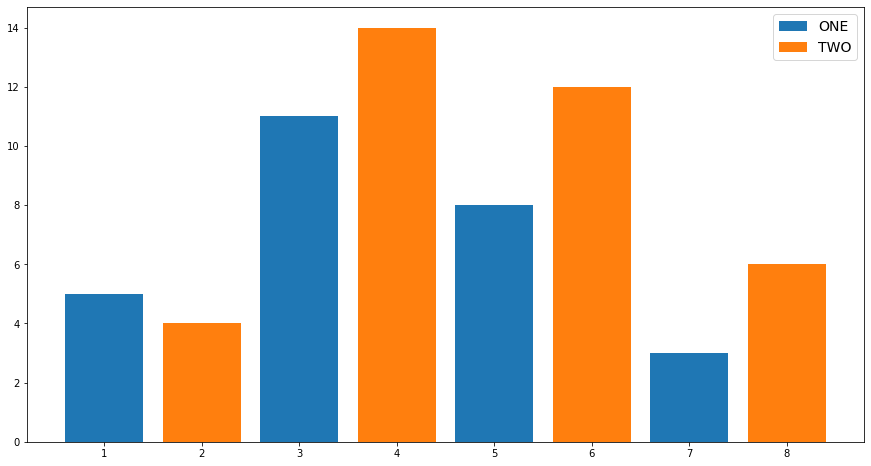

In [175]:
plt.figure(figsize= (15,8))
plt.bar([1,3,5,7], [5,11,8,3], label = 'ONE')
plt.bar([2,4,6,8], [4,14,12,6], label = 'TWO')
plt.legend(fontsize = 14)
plt.show()

### Scatter Plot

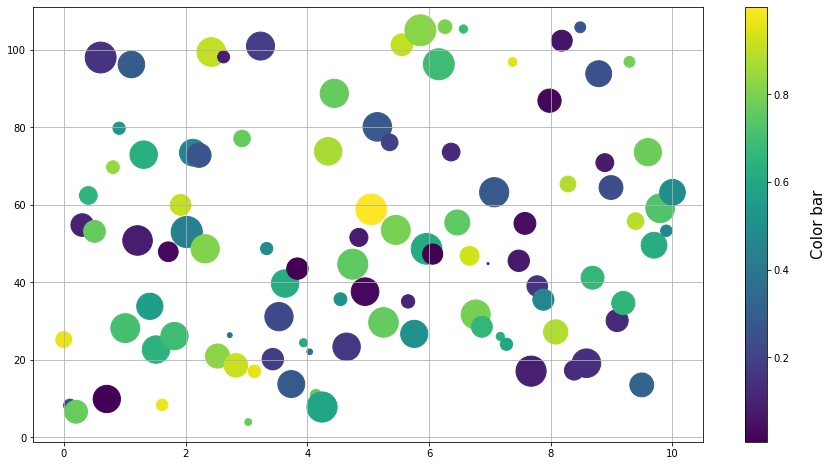

In [189]:
x = np.linspace(0,10, 100)
e = np.random.rand(100)* 100
y = x + e

scale = np.random.rand(100) * 1000
color = np.random.random(100)

plt.figure(figsize= (15,8))
plt.scatter(x, y, s = scale, c = color)

plt.colorbar().set_label('\nColor bar', fontsize = 15)

plt.grid()
#plt.savefig('scatter.jpg', dpi = 600)
plt.show()

### Histogram Plot

$$ f(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{1}{2}\Large(\frac{x-μ}{σ}\Large)^{2}} $$

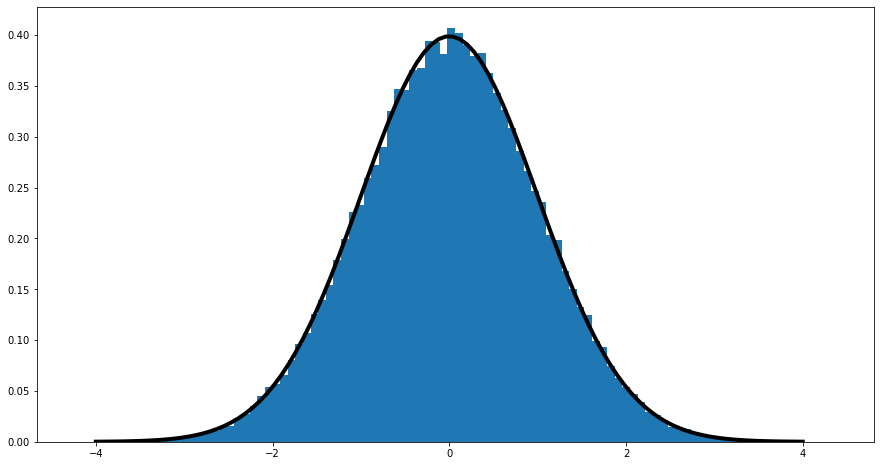

In [194]:
data = np.random.normal(0,1, 100000)

x = np.linspace(-4,4, 100)
y = 1 / np.sqrt(2 * np.pi) * np.exp(-x**2 /2)

plt.figure(figsize= (15,8))
plt.plot(x, y, lw = 4, c = 'k')
plt.hist(data, 100, density=1)
plt.show()

# References

- [QuantEcon](https://lectures.quantecon.org/py/)
- [Reference guide for Numpy](https://docs.scipy.org/doc/numpy/reference/)
- [Reference guide for matplotlib](https://matplotlib.org/stable/index.html)

